In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import heapq
%matplotlib inline

Load the data: it is useful in our code to load the ratings, movies, and users as separate arrays

In [2]:
Y_data = np.loadtxt('data/data.txt').astype(int)
ratings = Y_data[:, 2]
movies = Y_data[:, 1]
users = Y_data[:, 0]

First, we make a histogram of all the movie ratings

Text(0.5,1,u'Histogram of All Movie Ratings')

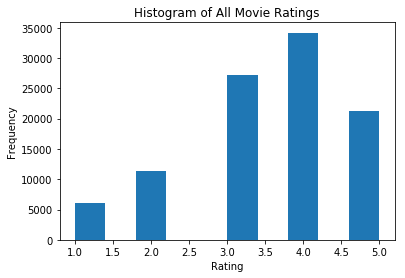

In [3]:
plt.figure(0)
plt.hist(ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of All Movie Ratings')

Now, we find the movies with the most ratings by counting the number of times the movie ID is found and finding the 
10 maximum counts

In [4]:
movie_counts = np.bincount(movies)
top_10_counts = heapq.nlargest(10, movie_counts) 
top_10_movies = []

for i in range(len(top_10_counts)):
    movie_id = int(np.where(movie_counts == top_10_counts[i])[0])
    top_10_movies.append(movie_id)

top_10_movies = np.asarray(top_10_movies)
print top_10_movies

[ 50 258 100 181 294 286 288   1 300 121]


We also define a helper function to return the ratings for a given movie

In [5]:
def get_ratings(movies, ratings, movie_id):
    r = []
    for i in range(len(movies)):
        if (movies[i] == movie_id):
            r.append(ratings[i])
    return r

We create a dictionary for all the ratings for each of the movies

In [6]:
movie_dic = {}
for i in range(1682):
    movie_dic[i+1] = get_ratings(movies, ratings, i+1)

Now we make an array of all of the ratings of the 10 most popular movies

In [7]:
top_10_ratings = []
for i in range(len(top_10_movies)):
    top_10_ratings += movie_dic[top_10_movies[i]]
top_10_ratings = np.asarray(top_10_ratings)
print top_10_ratings

[5 4 5 ... 4 4 5]


We now plot a histogram of all the ratings of the 10 most popular movies

Text(0.5,1,u'Histogram of 10 Most Popular Movie Ratings')

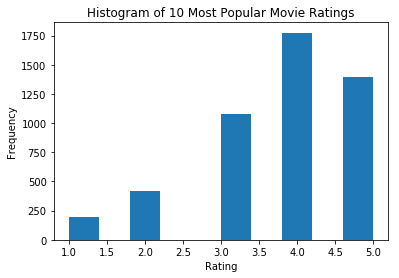

In [8]:
plt.figure(1)
plt.hist(top_10_ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of 10 Most Popular Movie Ratings')

We now make an array of the average ratings for all the movies, only counting movies with 100 or more ratings

In [9]:
average_ratings = np.zeros(1682)
qualified_number = 100
for i in range(len(average_ratings)):
    movie_i_ratings = movie_dic[i + 1]
    if (len(movie_i_ratings) >= qualified_number):
        average_ratings[i] = np.average(movie_i_ratings)

We use this array of average ratings to create an array of the 10 best movies by finding the maximum values in the average array

In [10]:
best_10_ratings = heapq.nlargest(10, average_ratings)
best_10_movies = []
for i in range(len(best_10_ratings)):
    movie_id = int(np.where(average_ratings == best_10_ratings[i])[0]) + 1
    best_10_movies.append(movie_id)
best_10_movies = np.asarray(best_10_movies)
print best_10_movies

[408 318 169 483  64 603  12  50 178 134]


Now, we create an array of all the ratings for the 10 best movies and plot a histogram of these ratings

In [11]:
best_10_all_ratings = []
for i in range(len(best_10_movies)):
    best_10_all_ratings += movie_dic[best_10_movies[i]]
best_10_all_ratings = np.asarray(best_10_all_ratings)
print best_10_all_ratings

[5 5 1 ... 5 3 5]


Text(0.5,1,u'Histogram of 10 Highest Rated Movie Ratings (minimum 100 ratings to be considered)')

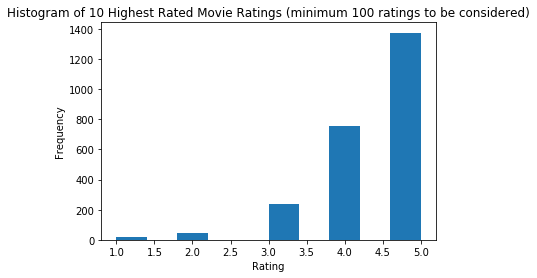

In [12]:
plt.figure(2)
plt.hist(best_10_all_ratings)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of 10 Highest Rated Movie Ratings (minimum ' + str(qualified_number) + ' ratings to be considered)')